# Ames, Iowa : Predicting Sales Prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from clean_helper import common_na_replace, test_na_replace, dtype_update
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Loading training dataset:-

In [2]:
train_df = pd.read_csv("train.csv")

- Looking at first few rows:-

In [3]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_df.duplicated().sum()

0

<AxesSubplot:>

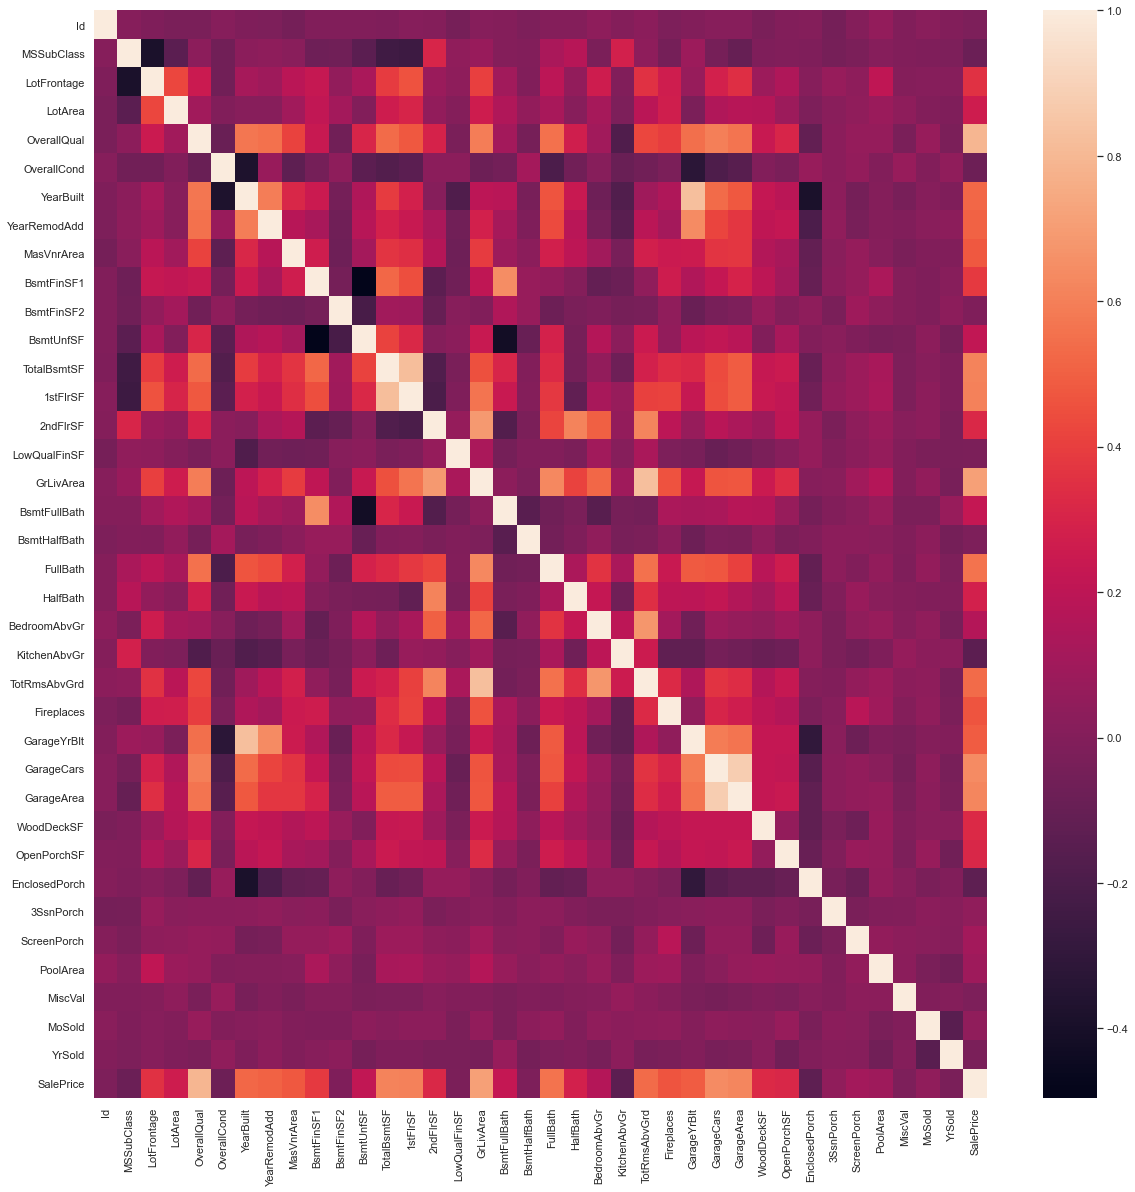

In [8]:
plt.figure(figsize=(20, 20))
sns.set(rc={"figure.figsize":(14, 14)})
sns.heatmap(train_df.corr())

- Dropping Id column:

In [9]:
train_df.drop(columns='Id', inplace=True)
train_df.shape

(1460, 80)

## Loading testing dataset:-

In [10]:
test_df = pd.read_csv("test.csv")

- Looking at first few rows:-

In [11]:
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [12]:
test_df.shape

(1459, 80)

- Dropping Id column:

In [13]:
test_df.drop(columns='Id', inplace=True)
test_df.shape

(1459, 79)

## Checking column names:-

In [14]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

- Looking at Sale Prices

## Checking Sales Price target variable:-

In [15]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 0, 'Price (USD)')

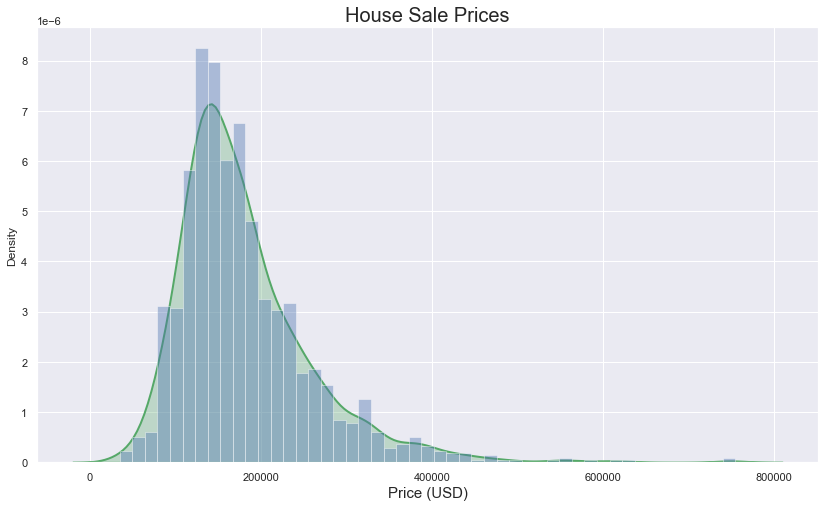

In [16]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.distplot(train_df["SalePrice"],\
             kde=True, \
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("House Sale Prices",fontsize = 20)
plt.xlabel("Price (USD)", fontsize = 15)

Text(0.5, 0, 'Price (USD) : log-scale')

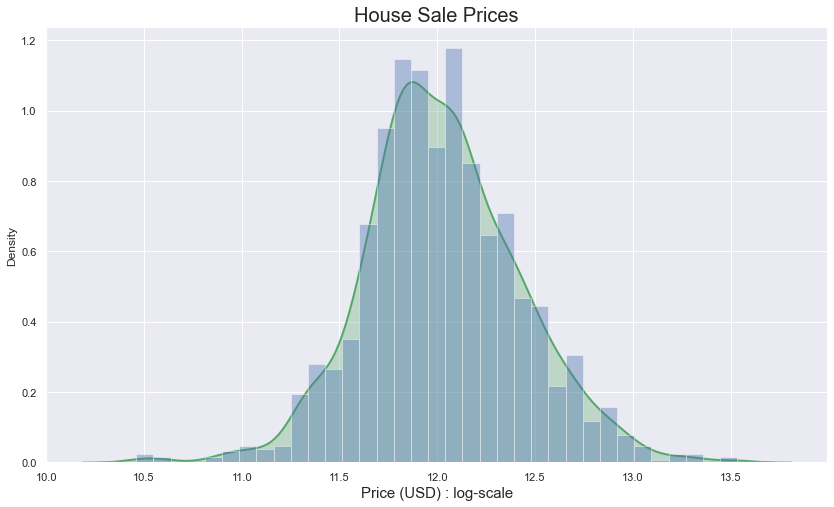

In [17]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.distplot(np.log(train_df["SalePrice"]),\
                    kde=True, \
                    kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("House Sale Prices",fontsize = 20)
plt.xlabel("Price (USD) : log-scale", fontsize = 15)

## Checking and removing outliers:-

- Train_df

In [18]:
# train_df[['LotFrontage']].boxplot()

In [19]:
train_df.loc[train_df.LotFrontage > 300,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [20]:
# train_df[['BsmtFinSF1']].boxplot()

In [21]:
train_df.loc[train_df.BsmtFinSF1 > 5000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [22]:
# train_df[['BsmtFinSF2']].boxplot()

In [23]:
train_df.loc[train_df.BsmtFinSF2 > 1400,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


In [24]:
# train_df[['TotalBsmtSF']].boxplot()

In [25]:
train_df.loc[train_df.TotalBsmtSF > 6000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [26]:
# train_df[['KitchenAbvGr']].boxplot()

In [27]:
train_df.loc[train_df.KitchenAbvGr == 3,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


In [28]:
# train_df[['MiscVal']].boxplot()

In [29]:
train_df.loc[train_df.MiscVal > 14000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500


In [30]:
train_df.loc[train_df.GrLivArea > 4000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [31]:
# train_df[['SalePrice']].boxplot()

In [32]:
train_df.loc[train_df.SalePrice > 700000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [33]:
train_df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [34]:
train_df.loc[train_df.Utilities == "NoSeWa",:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


- Final values to be removed

In [35]:
train_df.shape

(1460, 80)

In [36]:
train_df = train_df.drop(train_df.index[[523, 934, 944, 1298, 346, 691, 1182]])

In [37]:
train_df.shape

(1453, 80)

- Test_df

In [38]:
# test_df[['BsmtFinSF1']].boxplot()

In [39]:
test_df.loc[test_df.BsmtFinSF1 > 4000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1089,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,17000,10,2007,New,Partial


In [40]:
# test_df[['TotalBsmtSF']].boxplot()

In [41]:
test_df.loc[test_df.TotalBsmtSF > 5000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1089,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,17000,10,2007,New,Partial


In [42]:
# test_df[['1stFlrSF']].boxplot()

In [43]:
test_df.loc[test_df['1stFlrSF'] > 5000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1089,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,17000,10,2007,New,Partial


In [44]:
# test_df[['TotRmsAbvGrd']].boxplot()

In [45]:
test_df.loc[test_df.TotRmsAbvGrd > 14,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1089,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,17000,10,2007,New,Partial


In [46]:
# test_df[['WoodDeckSF']].boxplot()

In [47]:
test_df.loc[test_df.WoodDeckSF > 1400,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1146,80,RL,NaN,15957,Pave,NaN,IR1,Low,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,9,2007,WD,Normal


In [48]:
# test_df[['EnclosedPorch']].boxplot()

In [49]:
test_df.loc[test_df.EnclosedPorch > 1000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1043,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,444,NaN,NaN,NaN,0,4,2007,WD,Normal


In [50]:
# test_df[['MiscVal']].boxplot()

In [51]:
test_df.loc[test_df.MiscVal > 12000,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1089,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,17000,10,2007,New,Partial


In [52]:
test_df['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [53]:
test_df.shape

(1459, 79)

In [54]:
test_df = test_df.drop(test_df.index[[1089, 1043]])

In [55]:
test_df.shape

(1457, 79)

## Checking null values:-

In [56]:
train_null_counts = train_df.isnull().sum()
train_null_counts[train_null_counts > 0]

LotFrontage      257
Alley           1362
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      689
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1448
Fence           1173
MiscFeature     1400
dtype: int64

In [57]:
test_null_counts = test_df.isnull().sum()
test_null_counts[test_null_counts > 0]

MSZoning           4
LotFrontage      227
Alley           1350
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1454
Fence           1167
MiscFeature     1406
SaleType           1
dtype: int64

In [58]:
for col_name in train_df.columns:
    print(col_name)
    print(train_df[col_name].unique())

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106.  42.  39. 104.
 144. 114. 128. 149. 168. 182. 138. 152. 124. 153.  46.]
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' '

### Imputing null values (common columns) in train/test data:

In [59]:
common_na_replace(train_df)
common_na_replace(test_df)

### Imputing rest of the null values in test data:

In [60]:
test_na_replace(test_df)

### Checking null value counts:

In [61]:
train_null_counts = train_df.isnull().sum()
train_null_counts[train_null_counts > 0]

Series([], dtype: int64)

In [62]:
test_null_counts = test_df.isnull().sum()
test_null_counts[test_null_counts > 0]

Series([], dtype: int64)

## Changing column data types that could be categories:-

In [63]:
dtype_update(train_df)
dtype_update(test_df)

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1453 non-null   object 
 1   MSZoning       1453 non-null   object 
 2   LotFrontage    1453 non-null   float64
 3   LotArea        1453 non-null   int64  
 4   Street         1453 non-null   object 
 5   Alley          1453 non-null   object 
 6   LotShape       1453 non-null   object 
 7   LandContour    1453 non-null   object 
 8   Utilities      1453 non-null   object 
 9   LotConfig      1453 non-null   object 
 10  LandSlope      1453 non-null   object 
 11  Neighborhood   1453 non-null   object 
 12  Condition1     1453 non-null   object 
 13  Condition2     1453 non-null   object 
 14  BldgType       1453 non-null   object 
 15  HouseStyle     1453 non-null   object 
 16  OverallQual    1453 non-null   object 
 17  OverallCond    1453 non-null   object 
 18  YearBuil

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1457 non-null   object 
 1   MSZoning       1457 non-null   object 
 2   LotFrontage    1457 non-null   float64
 3   LotArea        1457 non-null   int64  
 4   Street         1457 non-null   object 
 5   Alley          1457 non-null   object 
 6   LotShape       1457 non-null   object 
 7   LandContour    1457 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1457 non-null   object 
 10  LandSlope      1457 non-null   object 
 11  Neighborhood   1457 non-null   object 
 12  Condition1     1457 non-null   object 
 13  Condition2     1457 non-null   object 
 14  BldgType       1457 non-null   object 
 15  HouseStyle     1457 non-null   object 
 16  OverallQual    1457 non-null   object 
 17  OverallCond    1457 non-null   object 
 18  YearBuil

## EDA

### For Numerical features (related to area) realtion with Sale Price:-

- Lot related:

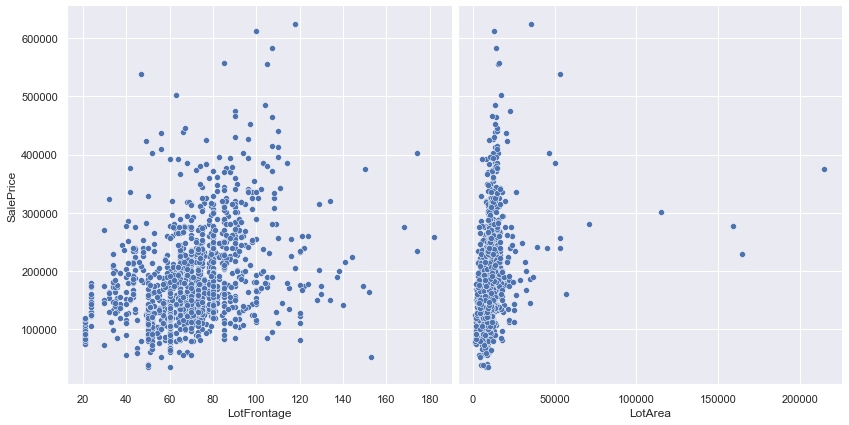

In [66]:
sns.pairplot(
    train_df,height=6,
    x_vars=["LotFrontage", "LotArea"],
    y_vars=["SalePrice"],
)

- Masonry veneer area relation:

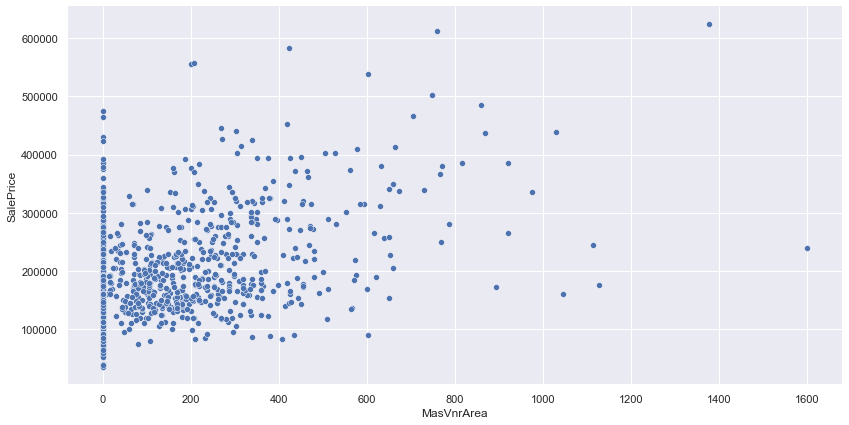

In [67]:
sns.pairplot(
    train_df,height=6,aspect=2,
    x_vars=["MasVnrArea"],
    y_vars=["SalePrice"],
)

- Basement area relation:

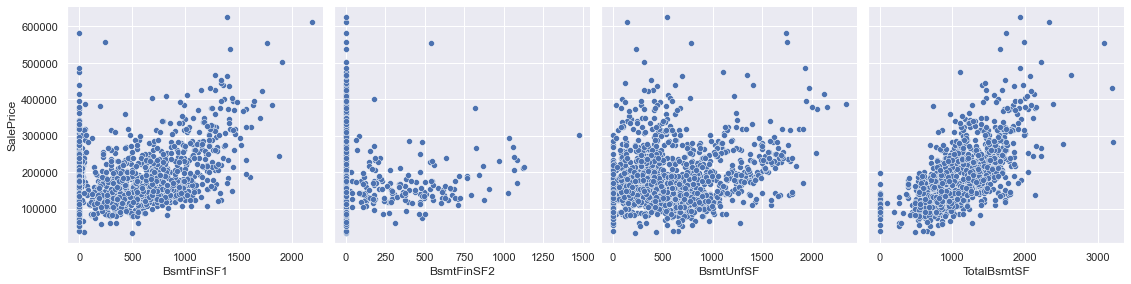

In [68]:
sns.pairplot(
    train_df,height=4,
    x_vars=["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF"],
    y_vars=["SalePrice"],
)

- Basement area relation:

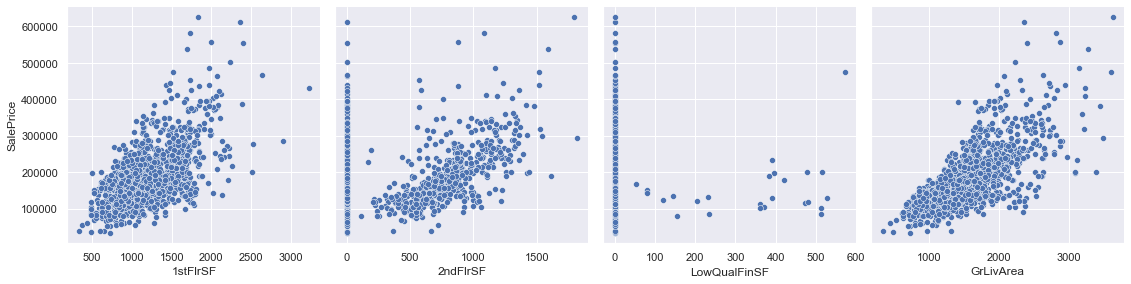

In [69]:
sns.pairplot(
    train_df,height=4,
    x_vars=["1stFlrSF", "2ndFlrSF", "LowQualFinSF","GrLivArea"],
    y_vars=["SalePrice"],
)

- Garage area relation:

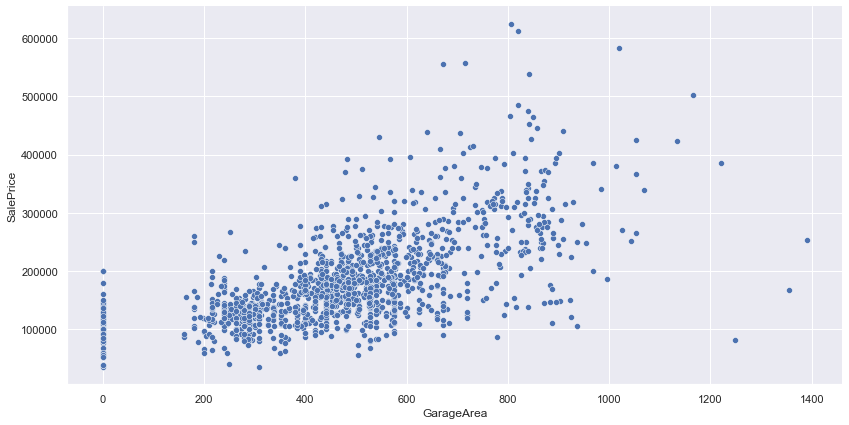

In [70]:
sns.pairplot(
    train_df,height=6,aspect=2,
    x_vars=["GarageArea"],
    y_vars=["SalePrice"],
)

- Deck/porch area relation:

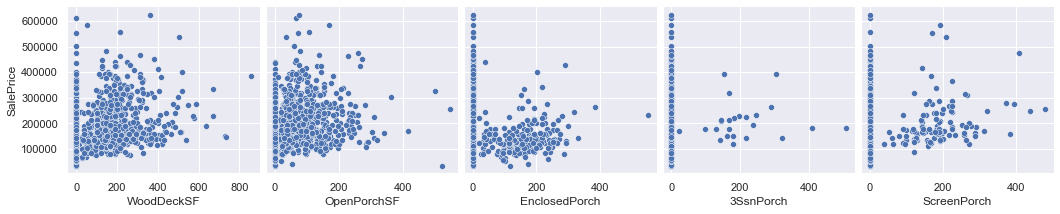

In [71]:
sns.pairplot(
    train_df,height=3,
    x_vars=["WoodDeckSF", "OpenPorchSF", "EnclosedPorch","3SsnPorch", "ScreenPorch"],
    y_vars=["SalePrice"],
)

- Pool area/Misc Val relation:

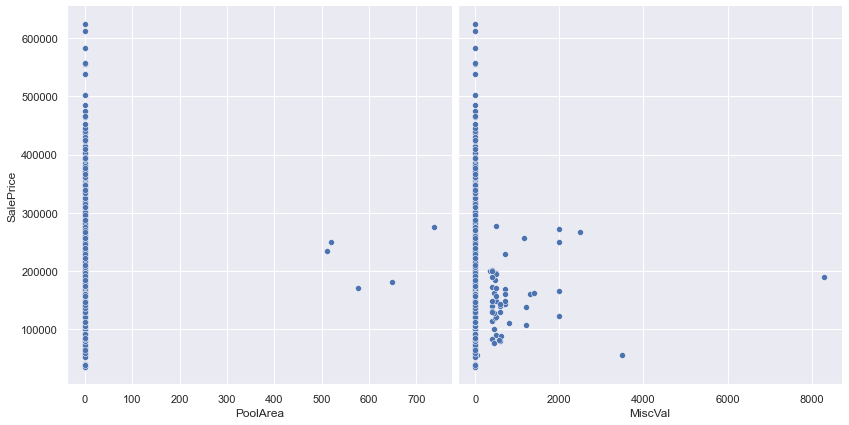

In [72]:
sns.pairplot(
    train_df,height=6,
    x_vars=["PoolArea", "MiscVal"],
    y_vars=["SalePrice"],
)

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

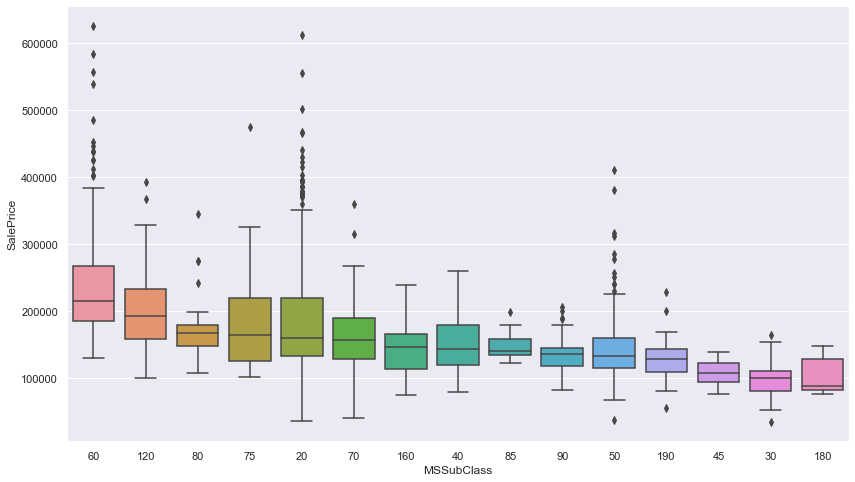

In [73]:
my_order = train_df.groupby('MSSubClass')['SalePrice']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=train_df, x='MSSubClass', y='SalePrice', order=my_order)

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

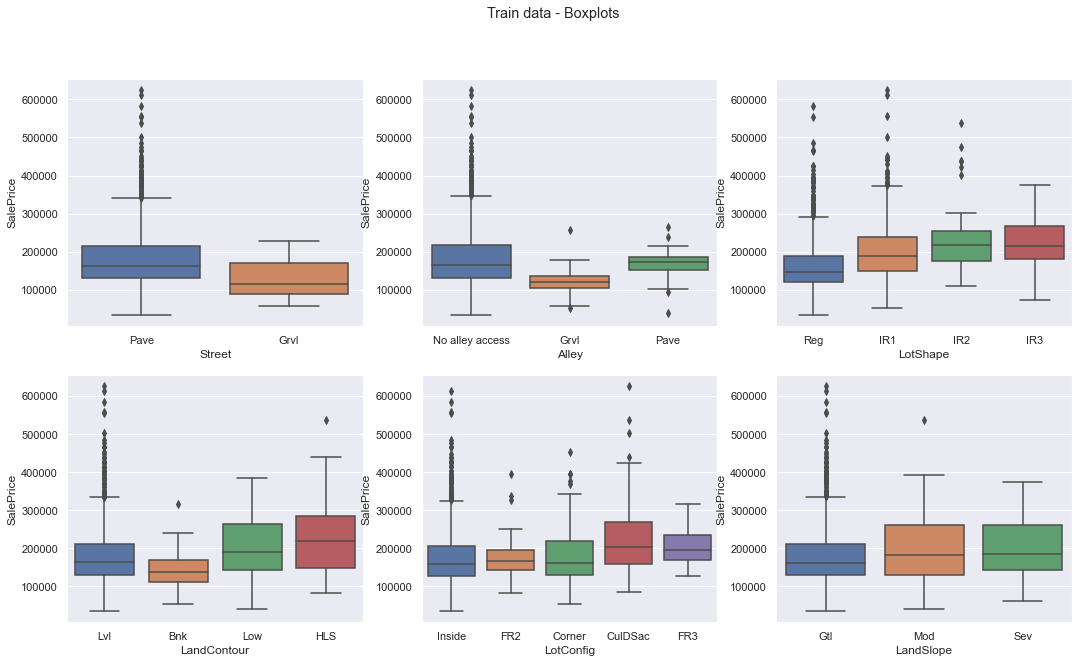

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Train data - Boxplots')

data=train_df
y='SalePrice'

sns.boxplot(ax=axes[0, 0], data=data, x='Street', y=y)
sns.boxplot(ax=axes[0, 1], data=data, x='Alley', y=y)
sns.boxplot(ax=axes[0, 2], data=data, x='LotShape', y=y)
sns.boxplot(ax=axes[1, 0], data=data, x='LandContour', y=y)
sns.boxplot(ax=axes[1, 1], data=data, x='LotConfig', y=y)
sns.boxplot(ax=axes[1, 2], data=data, x='LandSlope', y=y)

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

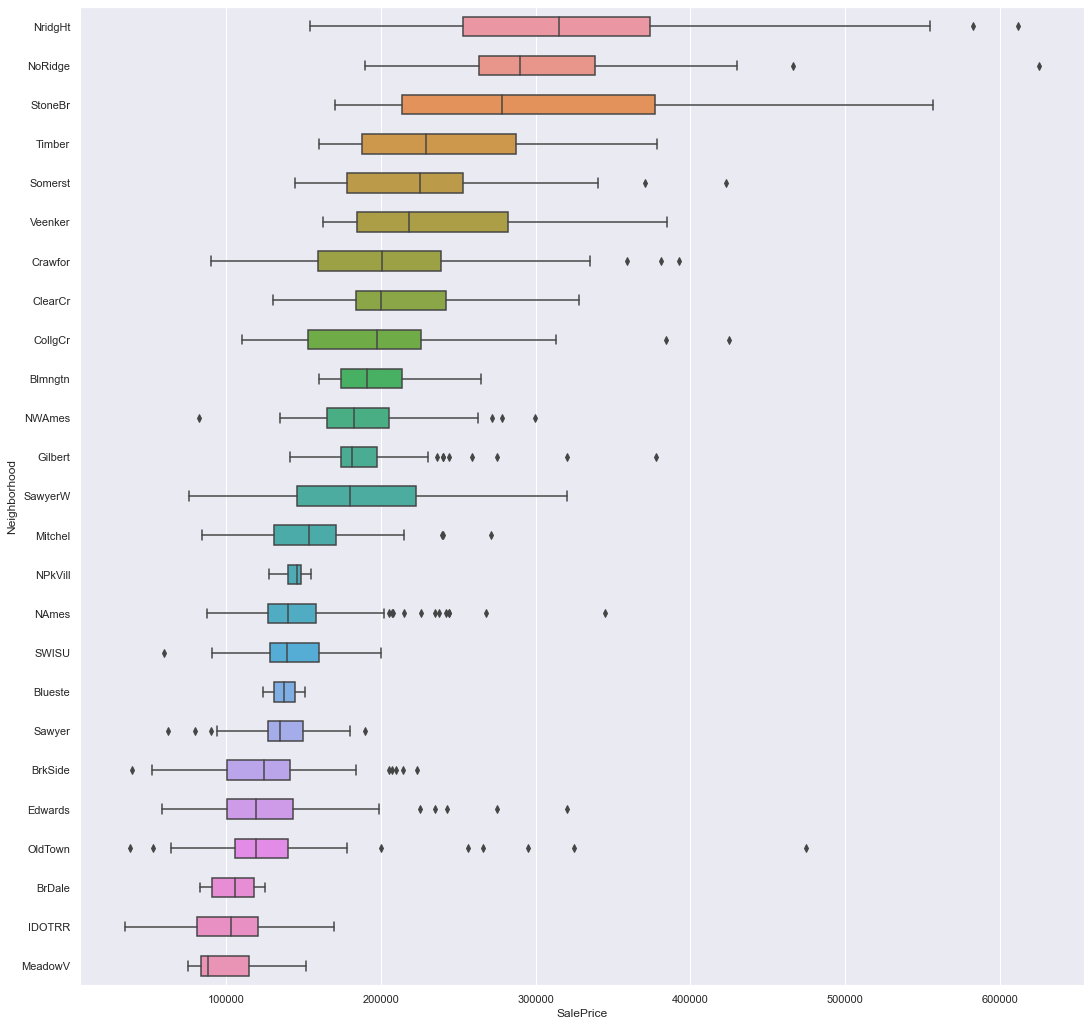

In [94]:
plt.figure(figsize=(18, 18))
my_order = train_df.groupby('Neighborhood')['SalePrice']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=train_df, x='SalePrice', y='Neighborhood', order=my_order, width=0.5)

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

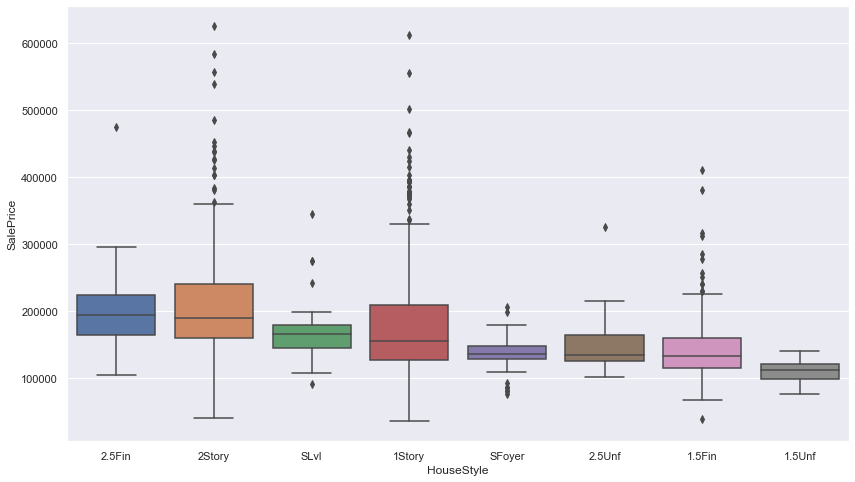

In [76]:
my_order = train_df.groupby('HouseStyle')['SalePrice']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=train_df, x='HouseStyle', y='SalePrice',order=my_order)

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

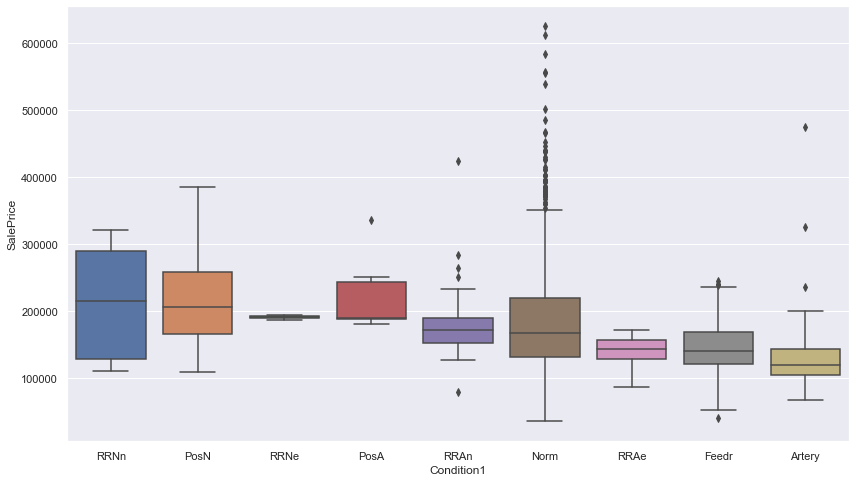

In [77]:
my_order = train_df.groupby('Condition1')['SalePrice']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=train_df, x='Condition1', y='SalePrice', order=my_order)

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

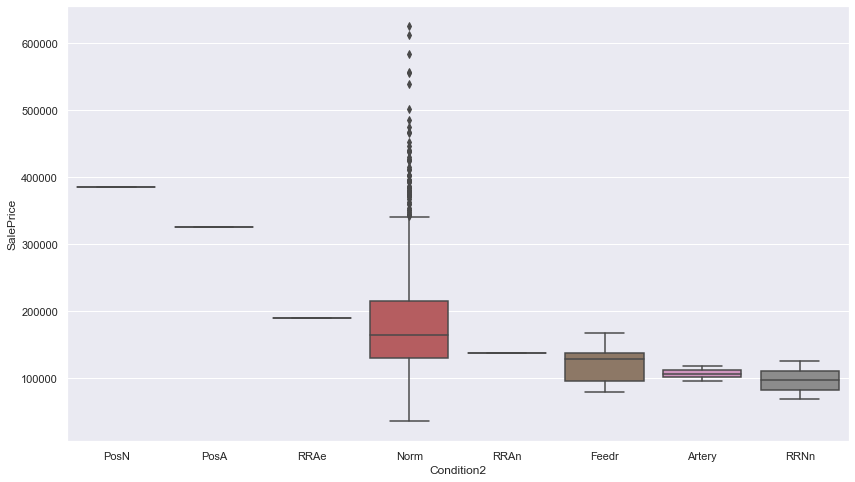

In [78]:
my_order = train_df.groupby('Condition2')['SalePrice']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=train_df, x='Condition2', y='SalePrice', order=my_order)

<AxesSubplot:xlabel='SalePrice', ylabel='Exterior1st'>

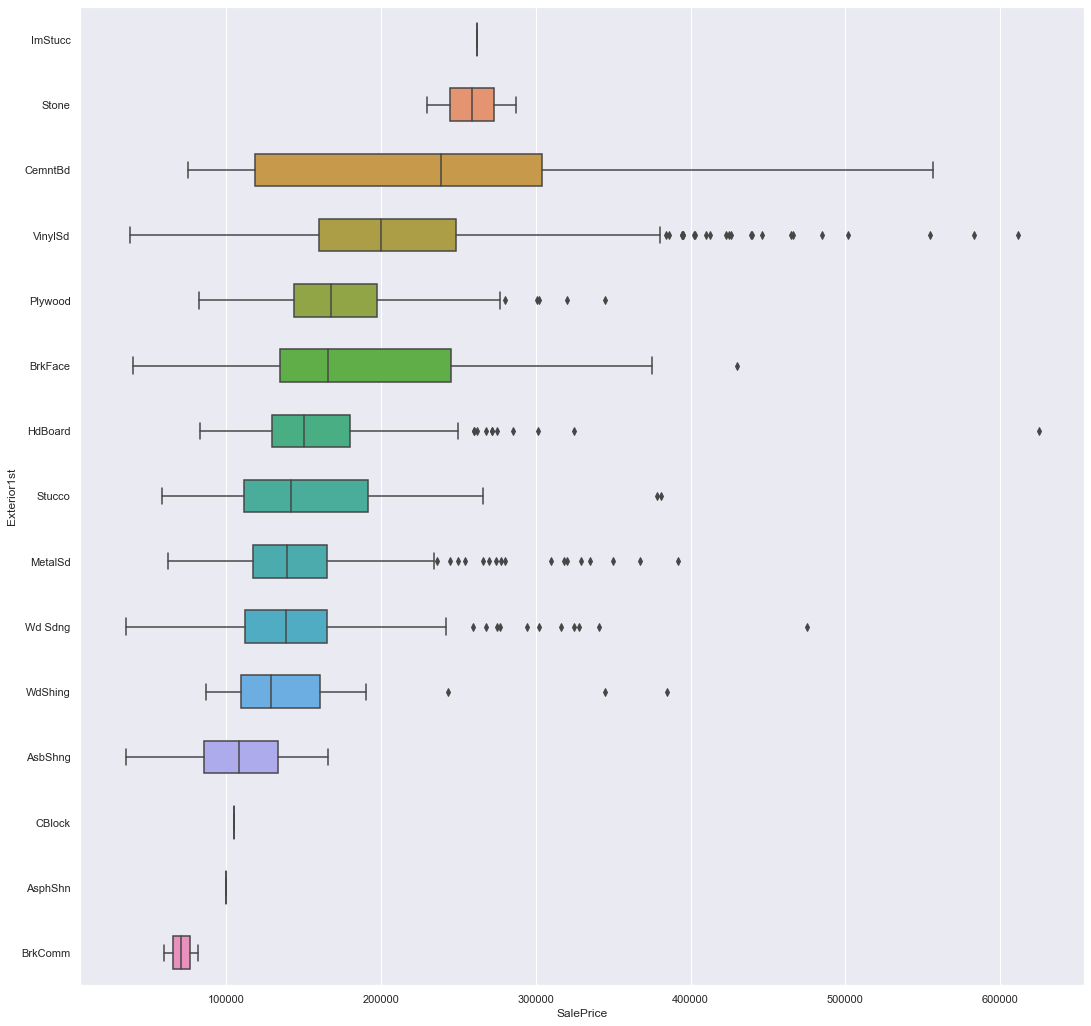

In [93]:
plt.figure(figsize=(18, 18))
my_order = train_df.groupby('Exterior1st')['SalePrice']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=train_df, x='SalePrice', y='Exterior1st',order=my_order, width=0.5)

<AxesSubplot:xlabel='SalePrice', ylabel='Exterior2nd'>

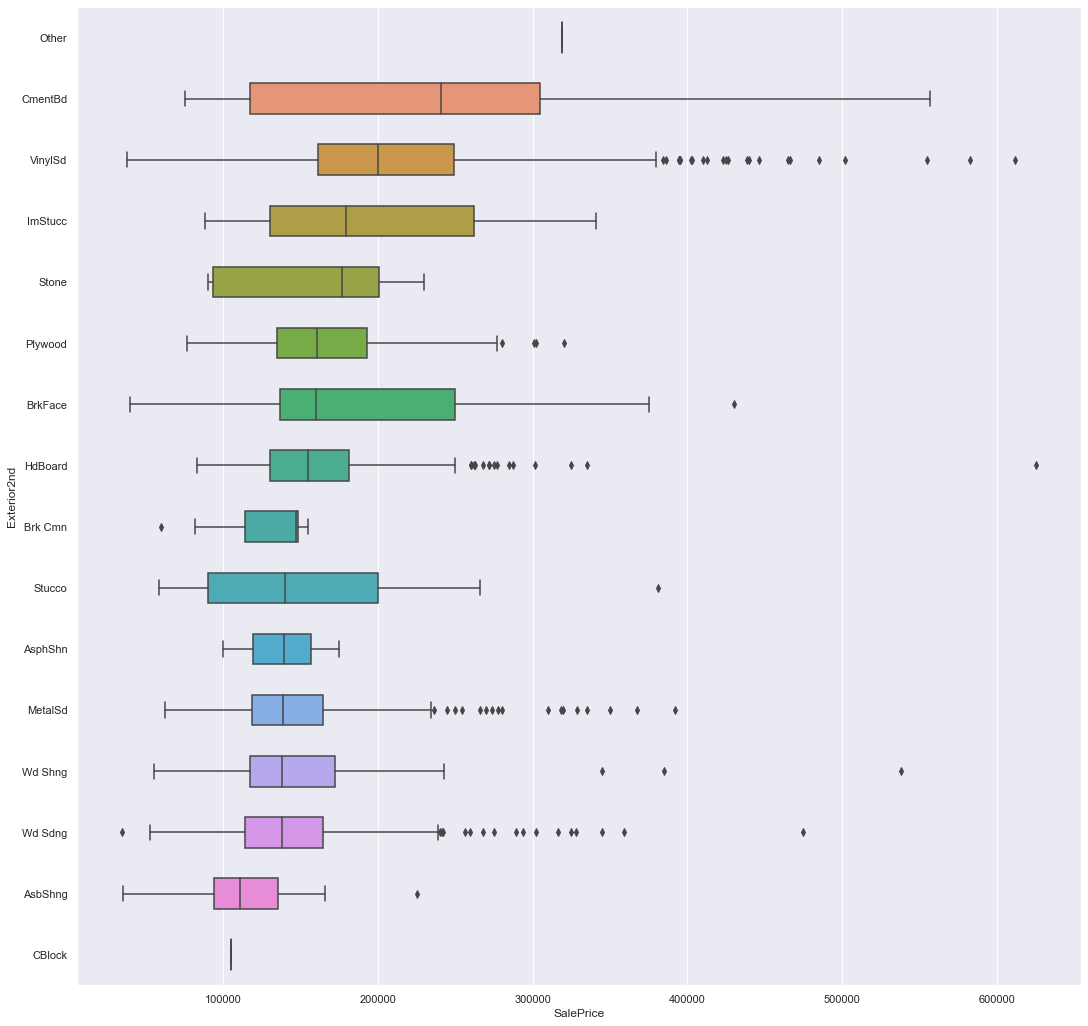

In [92]:
plt.figure(figsize=(18, 18))
my_order = train_df.groupby('Exterior2nd')['SalePrice']\
           .median().sort_values(ascending=False).index
sns.boxplot(data=train_df, x='SalePrice', y='Exterior2nd', order=my_order, width=0.5)

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

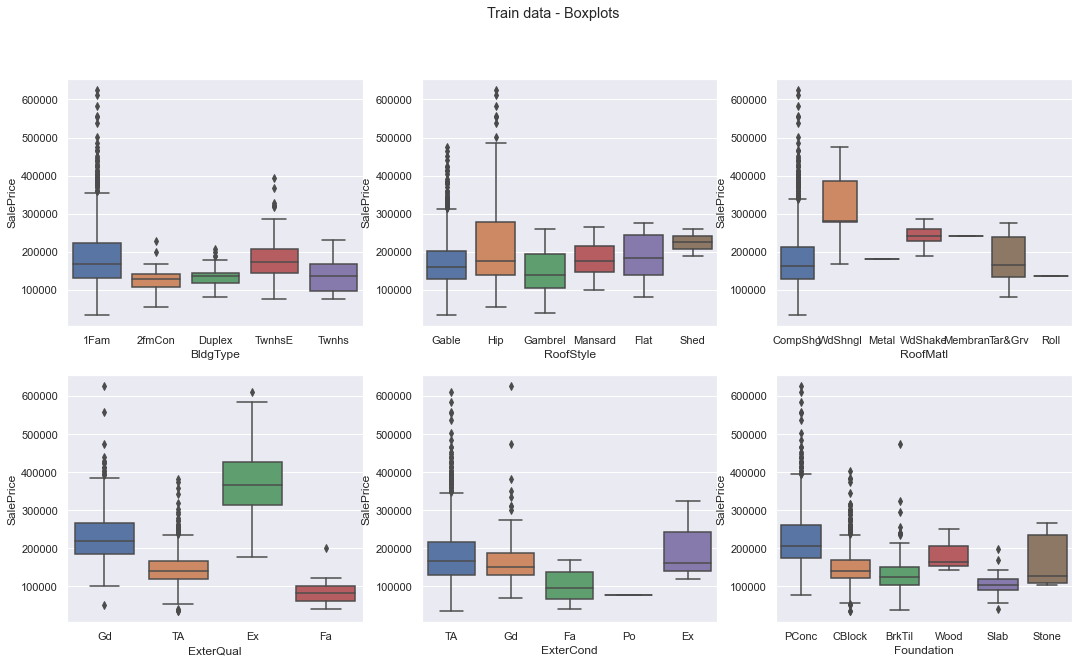

In [82]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Train data - Boxplots')

data=train_df
y='SalePrice'

sns.boxplot(ax=axes[0, 0], data=data, x='BldgType', y=y)
sns.boxplot(ax=axes[0, 1], data=data, x='RoofStyle', y=y)
sns.boxplot(ax=axes[0, 2], data=data, x='RoofMatl', y=y)
sns.boxplot(ax=axes[1, 0], data=data, x='ExterQual', y=y)
sns.boxplot(ax=axes[1, 1], data=data, x='ExterCond', y=y)
sns.boxplot(ax=axes[1, 2], data=data, x='Foundation', y=y)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

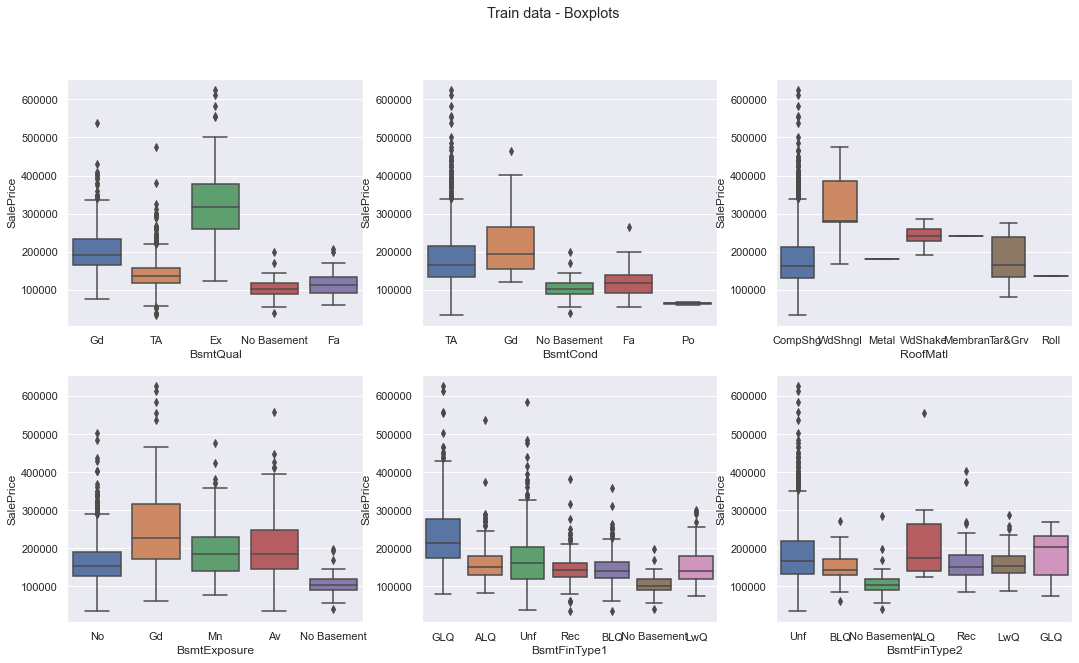

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Train data - Boxplots')

data=train_df
y='SalePrice'

sns.boxplot(ax=axes[0, 0], data=data, x='BsmtQual', y=y)
sns.boxplot(ax=axes[0, 1], data=data, x='BsmtCond', y=y)
sns.boxplot(ax=axes[0, 2], data=data, x='RoofMatl', y=y)
sns.boxplot(ax=axes[1, 0], data=data, x='BsmtExposure', y=y)
sns.boxplot(ax=axes[1, 1], data=data, x='BsmtFinType1', y=y)
sns.boxplot(ax=axes[1, 2], data=data, x='BsmtFinType2', y=y)

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

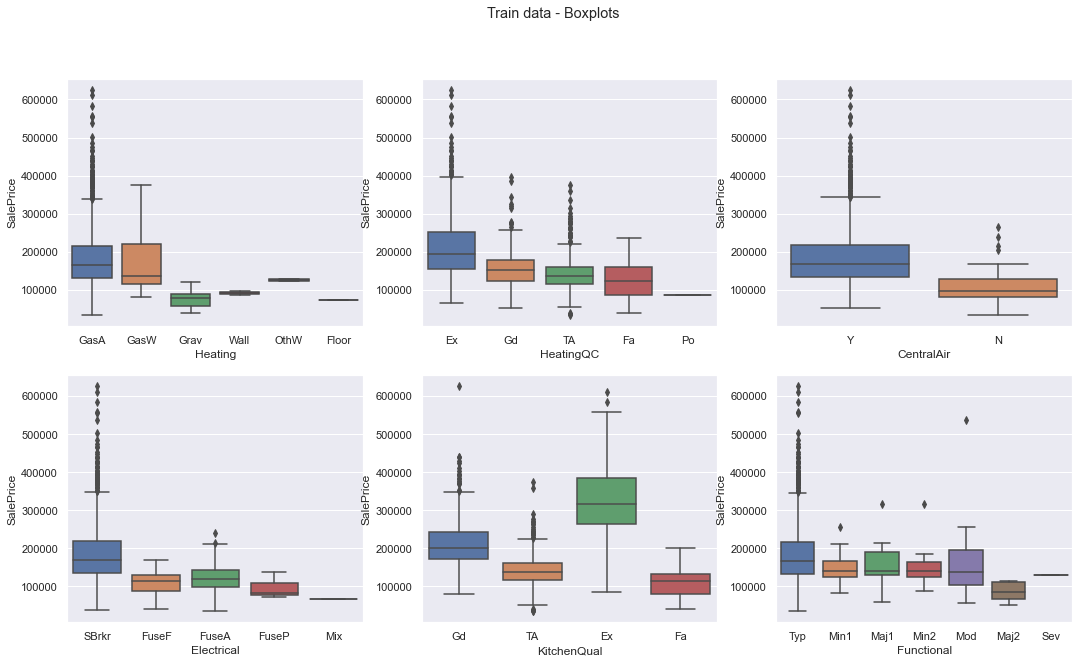

In [84]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Train data - Boxplots')

data=train_df
y='SalePrice'

sns.boxplot(ax=axes[0, 0], data=data, x='Heating', y=y)
sns.boxplot(ax=axes[0, 1], data=data, x='HeatingQC', y=y)
sns.boxplot(ax=axes[0, 2], data=data, x='CentralAir', y=y)
sns.boxplot(ax=axes[1, 0], data=data, x='Electrical', y=y)
sns.boxplot(ax=axes[1, 1], data=data, x='KitchenQual', y=y)
sns.boxplot(ax=axes[1, 2], data=data, x='Functional', y=y)

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

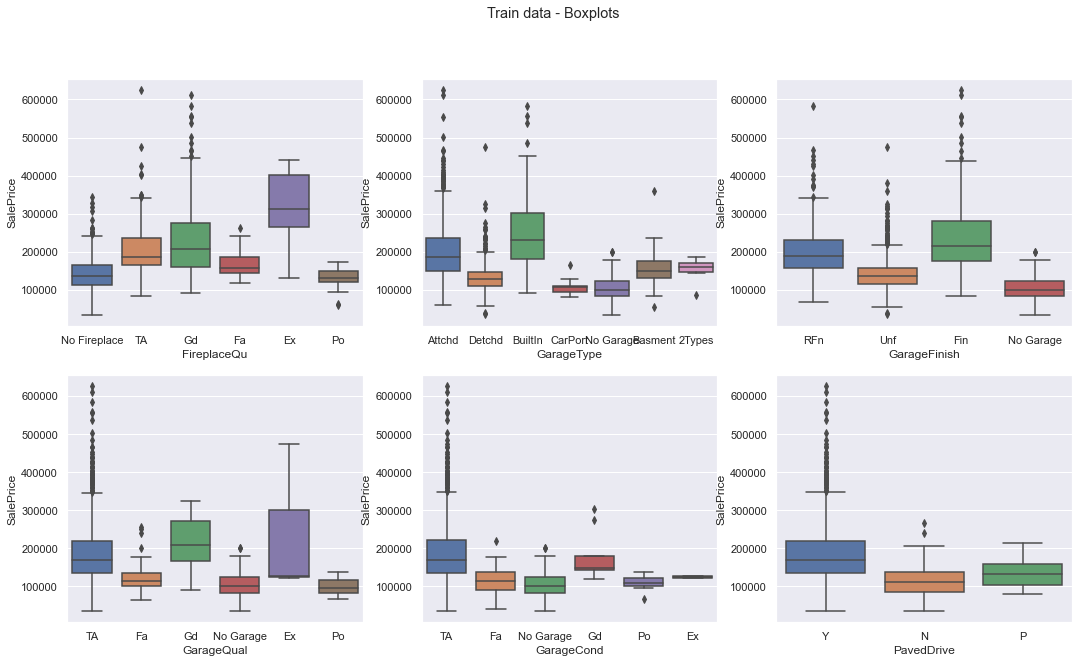

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Train data - Boxplots')

data=train_df
y='SalePrice'

sns.boxplot(ax=axes[0, 0], data=data, x='FireplaceQu', y=y)
sns.boxplot(ax=axes[0, 1], data=data, x='GarageType', y=y)
sns.boxplot(ax=axes[0, 2], data=data, x='GarageFinish', y=y)
sns.boxplot(ax=axes[1, 0], data=data, x='GarageQual', y=y)
sns.boxplot(ax=axes[1, 1], data=data, x='GarageCond', y=y)
sns.boxplot(ax=axes[1, 2], data=data, x='PavedDrive', y=y)

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

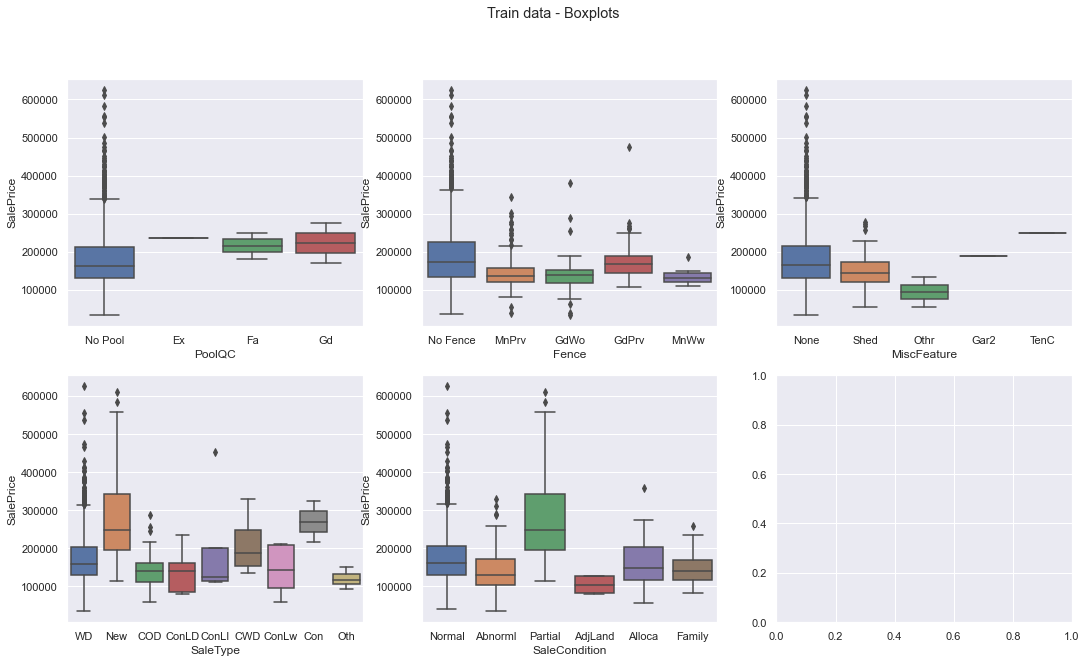

In [86]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Train data - Boxplots')

data=train_df
y='SalePrice'

sns.boxplot(ax=axes[0, 0], data=data, x='PoolQC', y=y)
sns.boxplot(ax=axes[0, 1], data=data, x='Fence', y=y)
sns.boxplot(ax=axes[0, 2], data=data, x='MiscFeature', y=y)
sns.boxplot(ax=axes[1, 0], data=data, x='SaleType', y=y)
sns.boxplot(ax=axes[1, 1], data=data, x='SaleCondition', y=y)

## Saving clean csv files:

In [ ]:
# train_df.to_csv('clean_train.csv')
# test_df.to_csv('clean_test.csv')